# The problem of evaluating clustering
**Topics**
- Use of datasets from `scikit-learn`
- Clustering algorithms from `scikit-learn`
- Techniques and metrics for evaluating clustering

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [2]:
import matplotlib.pyplot as plt

## Datasets for classification
Synthetic and real datasets

### Make blobs

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(n_samples=10000, centers=3, n_features=2, random_state=0, 
                  cluster_std=2, center_box=(-10.0, 10.0))

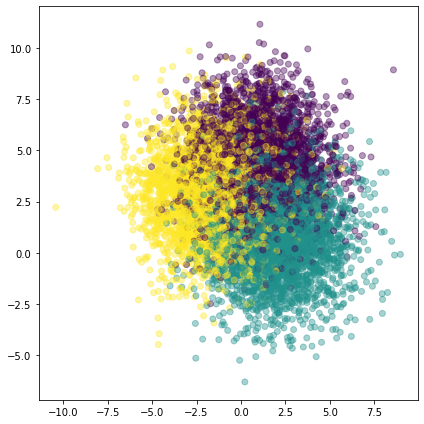

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:,0], X[:,1], c=y, alpha=0.4)
plt.tight_layout()
plt.show()

### IRIS

In [6]:
from sklearn import datasets
from sklearn.decomposition import PCA

In [7]:
data = datasets.load_iris(return_X_y=False, as_frame=True)

In [8]:
data.data.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [9]:
data.target.head(2)

0    0
1    0
Name: target, dtype: int64

In [10]:
data.data.shape

(150, 4)

In [11]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
pca = PCA(n_components=2)
pca.fit(data.data)
X_iris = pca.transform(data.data)

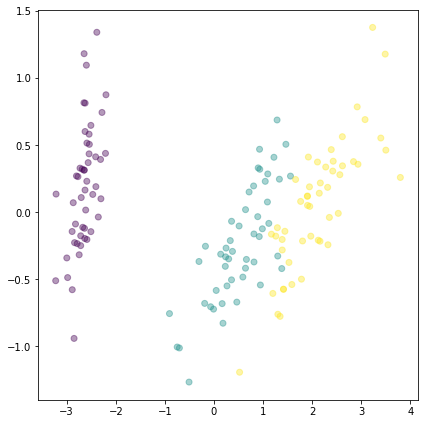

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X_iris[:,0], X_iris[:,1], c=data.target.values, alpha=0.4)
plt.tight_layout()
plt.show()

## MNIST

In [14]:
images = datasets.load_digits(as_frame=True)

In [15]:
images.data.head(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


In [16]:
images.target.head(5)

0    0
1    1
2    2
3    3
4    4
Name: target, dtype: int64

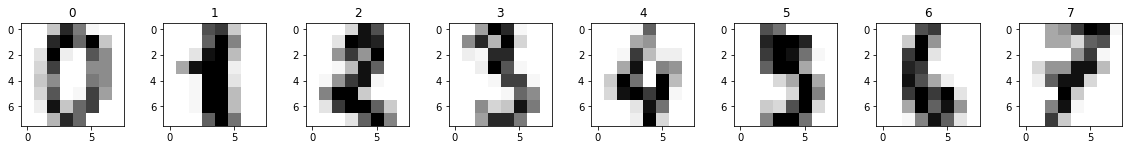

In [17]:
cols = 8
fig, ax = plt.subplots(figsize=(16, 2), ncols=8)
for i, row in images.data.iloc[:8].iterrows():
    ax[i].imshow(row.values.reshape(8, -1), cmap='Greys')
    ax[i].set_title(images.target[i])
plt.tight_layout()
plt.show()

# Clustering

In [18]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [19]:
benchmark = {
    'KM': KMeans,
    'HC': AgglomerativeClustering
}

In [20]:
n_clusters = len(data.target_names)
algo = {}
for label, class_ in benchmark.items():
    algo[label] = class_(n_clusters=n_clusters)

## Train and Test split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
def split(X, y, test_size=0.33):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

## Fit and Predict

In [23]:
X_train, X_test, y_train, y_test = split(data.data, data.target)

In [24]:
for label, algorithm in algo.items():
    algorithm.fit(X_train)

In [25]:
predictions = {}
for label, algorithm in algo.items():
    predictions[label] = algorithm.fit_predict(X_test)

In [26]:
predictions['HC']

array([0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2, 1, 0,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 2, 0, 2])

In [27]:
y_test.values

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

## Evaluate
See [https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, adjusted_rand_score

In [29]:
print(classification_report(y_test.values, predictions['KM']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.00      0.00      0.00        15
           2       0.21      0.25      0.23        16

    accuracy                           0.46        50
   macro avg       0.40      0.42      0.41        50
weighted avg       0.45      0.46      0.45        50



## Fix problems
1. Align (map) cluster labels and target variables labels)
2. Count pairwise

### Alignment

In [34]:
from collections import defaultdict

In [32]:
y_test.values

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [33]:
predictions['KM']

array([2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0,
       0, 2, 2, 1, 2, 1], dtype=int32)

In [37]:
ground_truth = defaultdict(set)
for i, x in enumerate(y_test.values):
    ground_truth[x].add(i)

In [40]:
gt = dict(ground_truth)

In [41]:
pred_truth = defaultdict(set)
for i, x in enumerate(predictions['KM']):
    pred_truth[x].add(i)
pt = dict(pred_truth)

In [42]:
gt

{1: {0, 3, 4, 6, 8, 9, 15, 17, 18, 32, 36, 41, 42, 45, 48},
 0: {1, 5, 11, 12, 13, 14, 20, 22, 28, 29, 30, 31, 33, 34, 37, 38, 39, 43, 44},
 2: {2, 7, 10, 16, 19, 21, 23, 24, 25, 26, 27, 35, 40, 46, 47, 49}}

In [43]:
pt

{2: {0, 3, 4, 6, 8, 9, 15, 17, 18, 21, 32, 35, 36, 40, 41, 42, 45, 46, 48},
 0: {1, 5, 11, 12, 13, 14, 20, 22, 28, 29, 30, 31, 33, 34, 37, 38, 39, 43, 44},
 1: {2, 7, 10, 16, 19, 23, 24, 25, 26, 27, 47, 49}}

In [50]:
mapping = []
for class_label, class_points in gt.items():
    collector, labels = [], []
    for cluster_label, cluster_points in pt.items():
        intersection = len(class_points.intersection(cluster_points))
        collector.append(intersection)
        labels.append(cluster_label)
    mapping.append((labels[np.argmax(collector)], class_label))

In [52]:
m = dict(mapping)


{2: 1, 0: 0, 1: 2}

In [53]:
kmp = [m[x] for x in predictions['KM']]

In [55]:
print(classification_report(y_test.values, kmp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.79      1.00      0.88        15
           2       1.00      0.75      0.86        16

    accuracy                           0.92        50
   macro avg       0.93      0.92      0.91        50
weighted avg       0.94      0.92      0.92        50



In [56]:
confusion_matrix(y_test.values, kmp)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  4, 12]])

### Pairwise evaluation

In [64]:
tp, fp, fn, tn = 0, 0, 0, 0
points_ids = list(range(len(y_test)))
for i, p1 in enumerate(points_ids):
    for p2 in points_ids[i+1:]:
        same_cluster = predictions['KM'][p1] == predictions['KM'][p2]
        same_class = y_test.values[p1] == y_test.values[p2]
        if same_cluster:
            if same_class:
                tp += 1
            else:
                fp += 1
        else:
            if same_class:
                fn += 1
            else:
                tn += 1

In [65]:
print('precision', tp / (tp + fp))
print('recall', tp / (tp + fn))

precision 0.8529411764705882
recall 0.8787878787878788
